## Data Science Intern @ LetsGrowMore Virtual Internship
#### Name : Viraj Jalindar Raut

#### Task 2 ( Intermediate Level Task )

#### Exploratory Data Analysis on Dataset - Terrorism 


### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("Modules are Imported")

Modules are Imported


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [3]:
terror_data=pd.read_csv('globalterrorismdb_0718dist.csv')
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Getting the Size of the Dataset

In [4]:
print("Number of rows in dataset: ", terror_data.shape[0])
print("Number of columns in dataset: ", terror_data.shape[1])

Number of rows in dataset:  181691
Number of columns in dataset:  135


### All the column names of the dataset

In [5]:
terror_data.columns.tolist()


['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

### Renaming Certain Columns

In [6]:
df = pd.DataFrame(terror_data, terror_data.rename(columns={ 'success': 'Success', 'location': 'Location', 'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'country': 'Country_code', 'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True))

In [7]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,Country_code,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Feature Creation
#### Here, a new column is added called Total_casualities which represents number of the people harmed (killed + injured) in terrorist attacks.

In [8]:
df['Total_casualities'] = df['Killed'] + df['Wounded']

In [9]:
df =  df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude','Location','AttackType','Killed','Wounded','Total_casualities','Target','Summary','Group','Target_type','Weapon_type','Motive', 'Success']]

In [10]:
col = df.columns.tolist()
print(col)

['Year', 'Month', 'Extended', 'Day', 'Country', 'State', 'Region', 'City', 'Latitude', 'Longitude', 'Location', 'AttackType', 'Killed', 'Wounded', 'Total_casualities', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive', 'Success']


In [11]:
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,...,Killed,Wounded,Total_casualities,Target,Summary,Group,Target_type,Weapon_type,Motive,Success
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,1.0,0.0,1.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,...,0.0,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,...,1.0,0.0,1.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,...,NaN,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,...,NaN,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               181691 non-null  int64  
 1   Month              181691 non-null  int64  
 2   Extended           181691 non-null  int64  
 3   Day                181691 non-null  int64  
 4   Country            181691 non-null  object 
 5   State              181270 non-null  object 
 6   Region             181691 non-null  object 
 7   City               181257 non-null  object 
 8   Latitude           177135 non-null  float64
 9   Longitude          177134 non-null  float64
 10  Location           55495 non-null   object 
 11  AttackType         181691 non-null  object 
 12  Killed             171378 non-null  float64
 13  Wounded            165380 non-null  float64
 14  Total_casualities  164817 non-null  float64
 15  Target             181055 non-null  object 
 16  Su

### Checking for Null Values

In [13]:
df.isnull().sum()

Year                      0
Month                     0
Extended                  0
Day                       0
Country                   0
State                   421
Region                    0
City                    434
Latitude               4556
Longitude              4557
Location             126196
AttackType                0
Killed                10313
Wounded               16311
Total_casualities     16874
Target                  636
Summary               66129
Group                     0
Target_type               0
Weapon_type               0
Motive               131130
Success                   0
dtype: int64

Here, we see some null values present in the dataset. But, they are not needed to be handled at this point because we only exploring the data.



### Exploratory Data Analysis and Data Visualization

In [14]:
corr = df.corr()


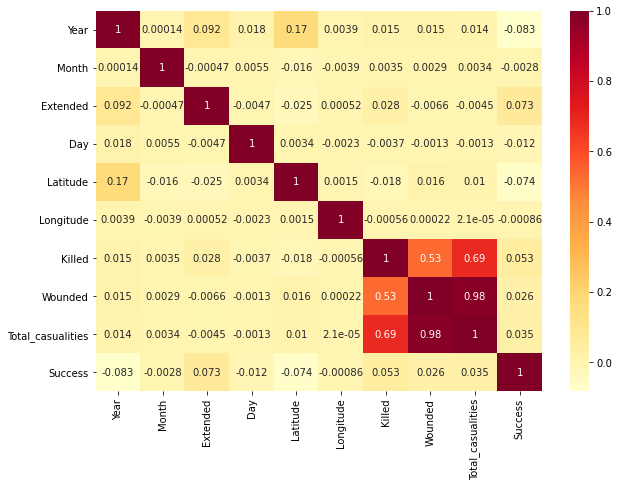

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot =  True, cmap = 'YlOrRd')
plt.show()

#### Let's see the visualization between Number of terrorists activities and Year

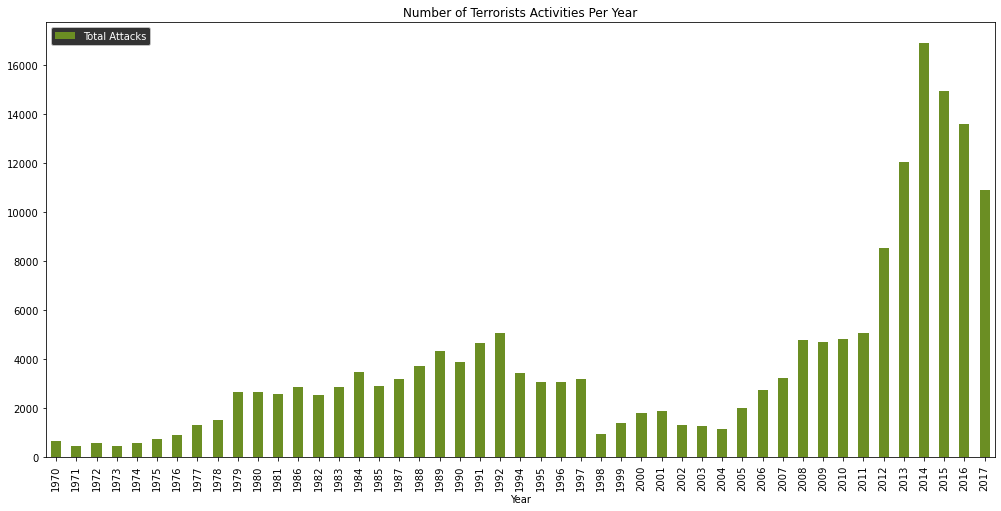

In [16]:
data = []

for i in df['Year'].unique():
    data.append([i , len(df[df['Year'] ==i])])
    
pd.DataFrame(data,columns = ['Year','Total Attacks']).plot(x = "Year", y = "Total Attacks", title='Number of Terrorists Activities Per Year',kind = 'bar',color='olivedrab',figsize = (17,8))
plt.style.use('dark_background')
plt.legend()


### Conclusion:
 •Generally, as the Time proceeds the Number of Terrorists Attacks also Increased.
 
 •The peak in terms of Number of Terrorists Attacks was observed in 2014.
 
 •A Decline in terms of Number of Terrorists Attacks has been observed since 2015 which shows the progress towards the mission of reducing such terrorists attacks.
 

In [17]:
cas_year=df.groupby('Year')['Total_casualities'].sum()[0:]

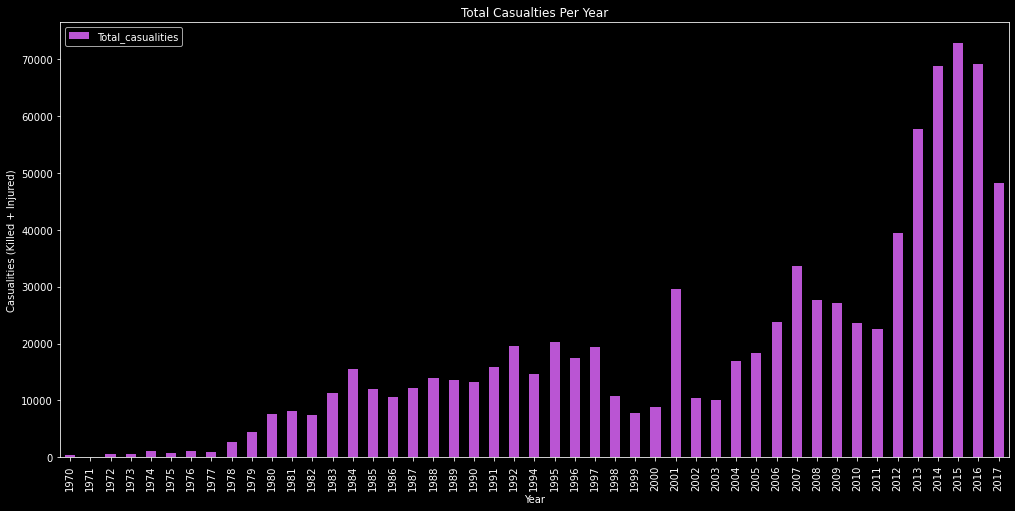

In [18]:
cas_year.plot.bar(xlabel='Year',ylabel='Casualities (Killed + Injured)',title='Total Casualties Per Year',color='mediumorchid',figsize=(17,8))
plt.style.use('dark_background')
plt.legend()

### Conclusion:
•Generally, as the Time proceeds the Number of People Harmed (Killed or Injured) also Increased Significantly.

•The peak in terms of Number of People Harmed was observed in 2015 with 70K+ casualties.

•Though there has been a decline in the Number of People Harmed after 2016 but these numbers are still very large and need to be reduced as soon as possible.
#### Let's see the visualization between Number of terrorists activities and Year

In [19]:
country = df['Country'].value_counts().index.tolist()
print("Number of Countries affected by Terrorist Attacks :", len(country))

Number of Countries affected by Terrorist Attacks : 205


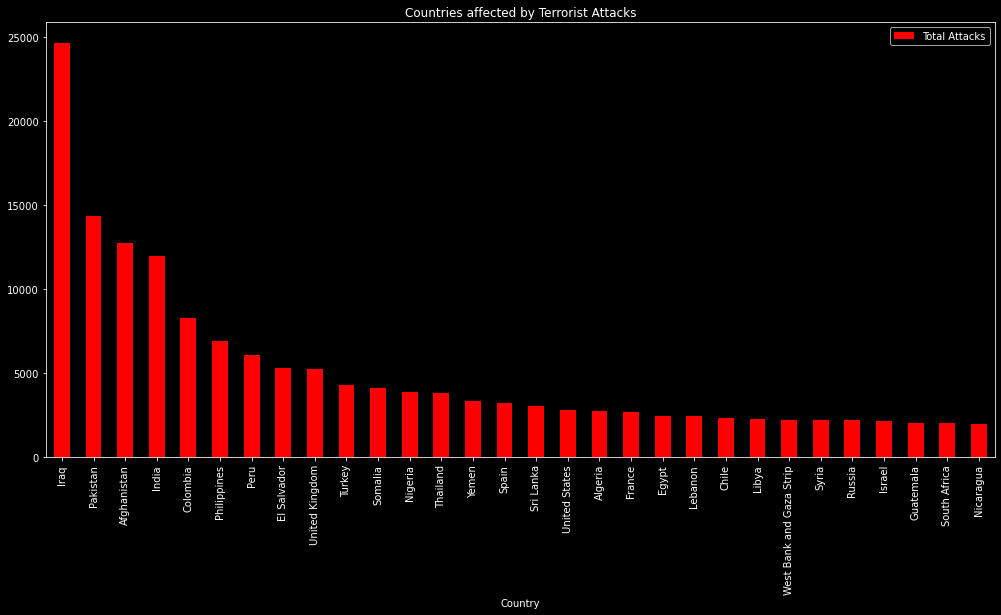

In [20]:
data = []

for i in df['Country'].value_counts()[0:30].index:
    data.append([i , len(df[df['Country'] ==i])])
    
pd.DataFrame(data,columns = ['Country','Total Attacks']).sort_values(by='Total Attacks', ascending=False).plot(x = "Country", y = "Total Attacks", title='Countries affected by Terrorist Attacks',kind = 'bar',color='red',figsize = (17,8))
plt.style.use('dark_background')
plt.legend()

### Conclusion:
 •The above image shows the Top 30 countries in terms of most number of terrorist attacks.
 
 •The top country which is most affected by terrorist attacks is Iraq.
 
 •The top 5 countries most affected by terrorist attacks are Iraq, Pakistan, Afganistan, India, and Colombia.
 #### Let's see, Top 30 Countries in terms of Causalities


In [21]:
cas_country = df.groupby('Country')['Total_casualities'].sum().to_frame().reset_index().sort_values('Total_casualities', ascending=False)
cas_country=cas_country.head(30)
cas_country

,Country,Total_casualities
84,Iraq,202982.0
0,Afghanistan,80213.0
134,Pakistan,64427.0
80,India,47108.0
167,Sri Lanka,29792.0
189,United States,24469.0
35,Colombia,23767.0
140,Philippines,22361.0
130,Nigeria,21728.0
175,Syria,21614.0


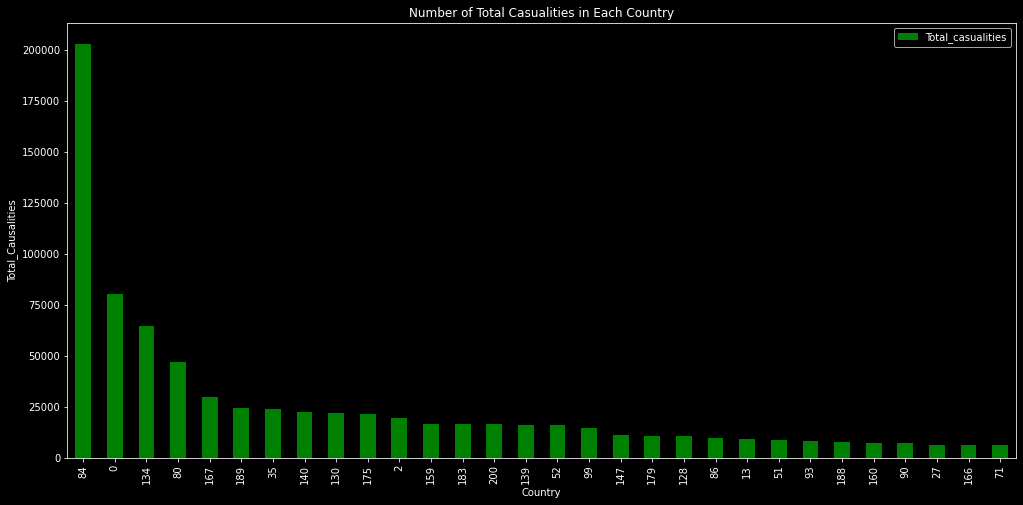

In [22]:
cas_country.plot.bar(xlabel='Country',ylabel='Total_Causalities',title='Number of Total Casualities in Each Country',color='green',figsize=(17,8))
plt.style.use('dark_background')
plt.legend()

### Conclusion:
 •The above image shows the Most Number of Total Casualities in Each Country.
 
 •The most affected country by Total Casualities is Iraq with 200K+ Casualities.
 
 •The top 5 countries most affected by terrorist attacks are Iraq, Afganistan, Pakistan, India, Sri Lanka.
#### Let's see, Top 30 states affected by the Terrorist Attacks.

In [23]:
state_aff = df['State'].value_counts()
print("Number of States affected by Terrorist Attacks :", len(state_aff))

Number of States affected by Terrorist Attacks : 2854


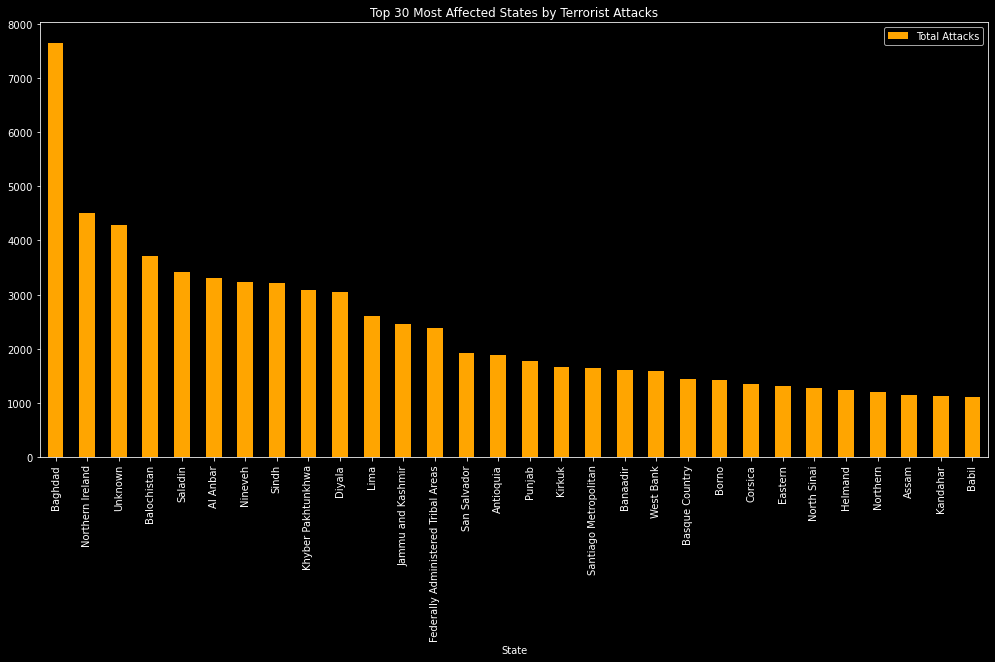

In [24]:
data = []

for i in df['State'].value_counts()[0:30].index:
    data.append([i , len(df[df['State'] ==i])])
    
pd.DataFrame(data,columns = ['State','Total Attacks']).sort_values(by='Total Attacks', ascending=False).plot(x = "State", y = "Total Attacks", title='Top 30 Most Affected States by Terrorist Attacks',kind = 'bar',color='orange',figsize = (17,8))
plt.style.use('dark_background')
plt.legend()

### Conclusion:
 •The above image shows the Top 30 states in terms of most number of terrorist attacks.
 
 •The most affected state by terrorist attacks is Baghdadm with 7500+ Terrorist Attacks.
 
 •The top 5 states most affected by terrorist attacks are Baghdadm, Northern Ireland, Balochistan, Saladin, Al Anbar.
 #### Lets see, Top 30 Regions affected by the Terrorist Attacks

In [25]:
region_aff = df['Region'].value_counts()
print("Number of Regions affected by the Terrorist Attacks :", len(region_aff))

Number of Regions affected by the Terrorist Attacks : 12


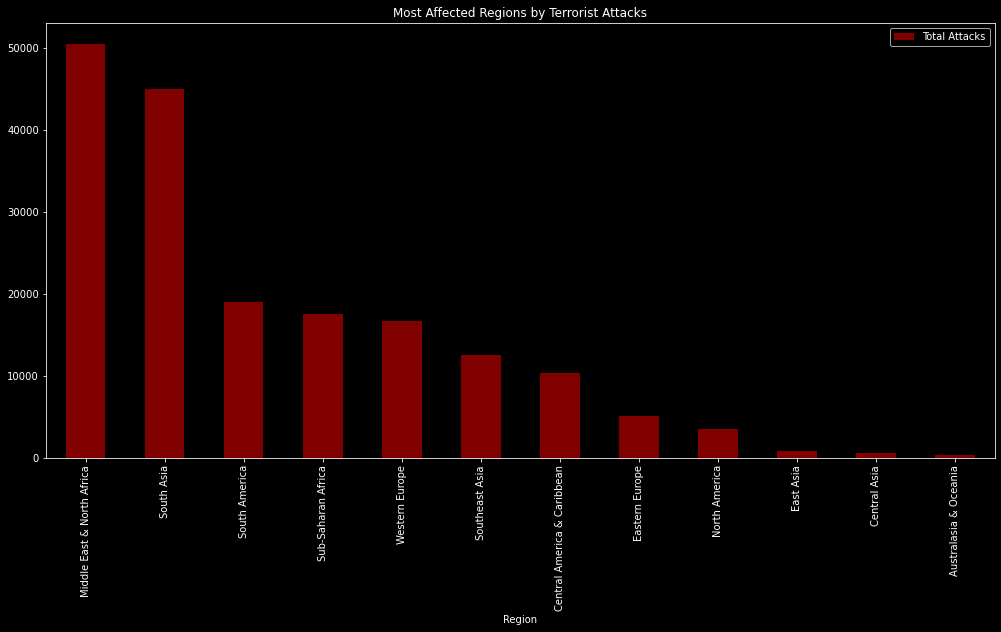

In [26]:
data = []

for i in df['Region'].value_counts()[0:30].index:
    data.append([i , len(df[df['Region'] ==i])])
    
pd.DataFrame(data,columns = ['Region','Total Attacks']).sort_values(by='Total Attacks', ascending=False).plot(x = "Region", y = "Total Attacks", title='Most Affected Regions by Terrorist Attacks',kind = 'bar',color='maroon',figsize = (17,8))
plt.style.use('dark_background')
plt.legend()

### Conclusion:
 •The above image shows the top regions in terms of most number of terrorist attacks.
 
 •The most affected region by terrorist attacks is Middle East and North Africa with 50K+ Terrorist Attacks.
 
 •The top 5 regions most affected by terrorist attacks are Middle East & North Africa, South Asia, South America, Sub-Saharan Africa, Western Europe.
#### Let's see, Top 10 Terrorist groups with most number of Attacks

In [27]:
terror_grps = df['Group'].value_counts()
print("Number of Terrorist groups that attacks :", len(terror_grps))

Number of Terrorist groups that attacks : 3537


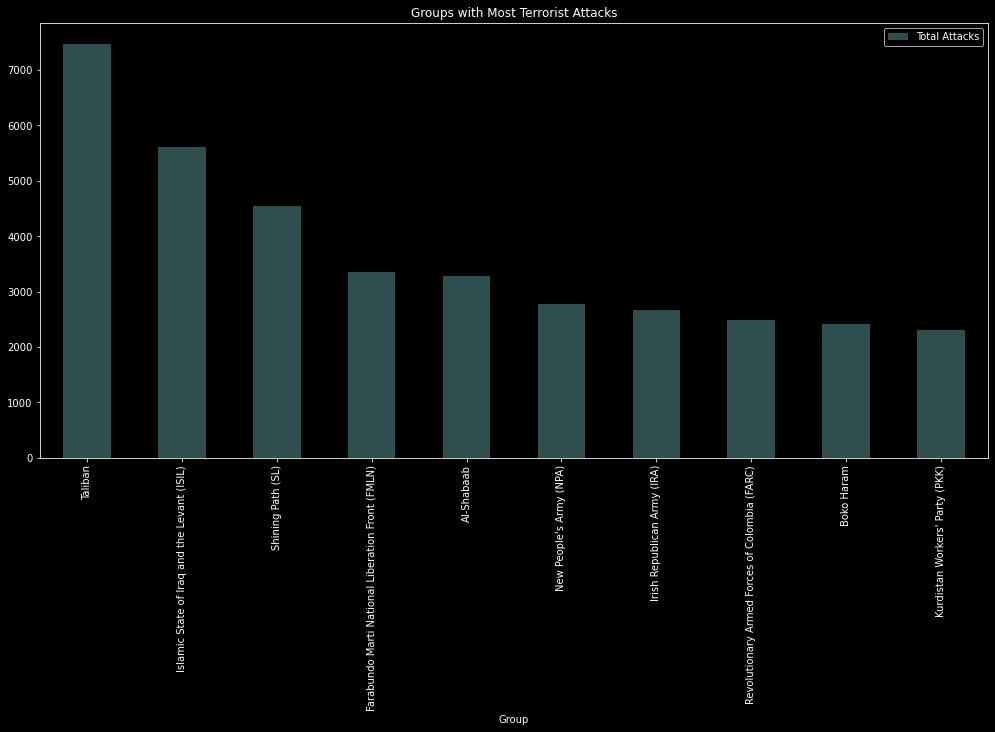

In [28]:
data = []

for i in df['Group'].value_counts()[1:11].index:
    data.append([i , len(df[df['Group'] ==i])])
    
plot_data=pd.DataFrame(data,columns = ['Group','Total Attacks']).sort_values(by='Total Attacks', ascending=False)
plot_data.plot(x = "Group", y = "Total Attacks", title='Groups with Most Terrorist Attacks',kind = 'bar',color='darkslategrey',figsize = (17,8))
plt.style.use('dark_background')
plt.legend()

### Conclusion:
 •The above image shows the top Groups with Most No. of Terrorist Attacks.
 
 •The Terrorist Group with Most No. of Terrorist Attacks is Taliban with 7K+ Terrorist Attacks.
 
 •The top 5 Groups with Most No. of Terrorist Attacks are 'Taliban', 'Islamic State of Iraq and the Levant (ISIL)', 'Shining Path (SL)', 'Farabundo Marti National Liberation Front (FMLN)', 'Al-Shabaab'.
 #### Let's see, most used attack types by terrorist


In [29]:
attack_types = df['AttackType'].value_counts()
print("Number of types of attacks executed by Terrorists :", len(attack_types))

Number of types of attacks executed by Terrorists : 9


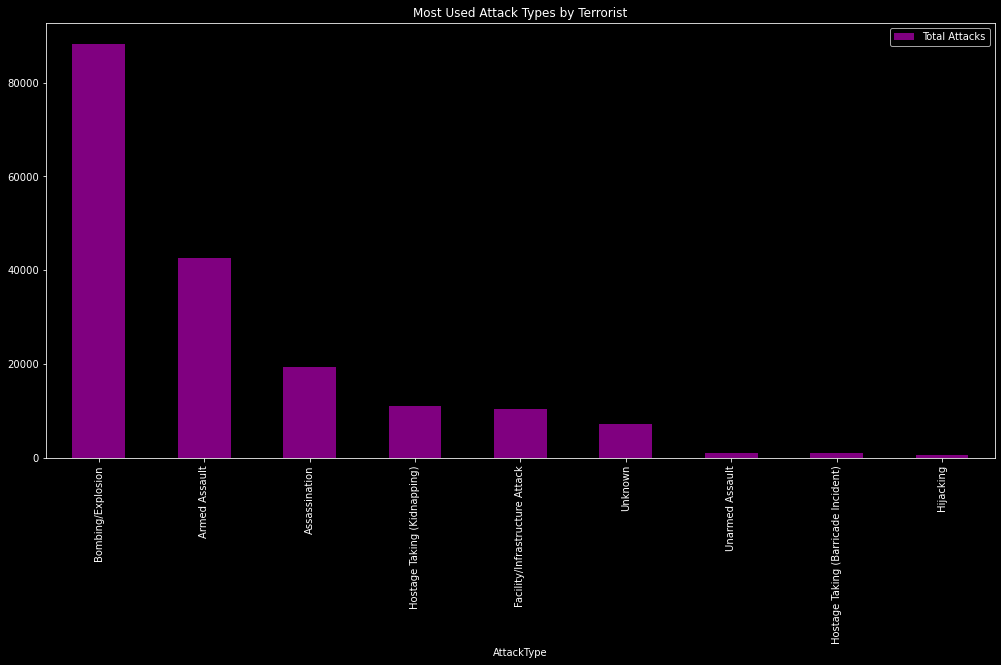

In [30]:
data = []

for i in df['AttackType'].value_counts().index:
    data.append([i , len(df[df['AttackType'] ==i])])
    
plot_data=pd.DataFrame(data,columns = ['AttackType','Total Attacks']).sort_values(by='Total Attacks', ascending=False)
plot_data.plot(x = "AttackType", y = "Total Attacks", title='Most Used Attack Types by Terrorist',kind = 'bar',color='purple',figsize = (17,8))
plt.style.use('dark_background')
plt.legend()

### Conclusion:
 •The above image shows the Most Used Attack Types by Terrorists.
 
 •The Most Used Attack Type by Terrorists is Bombing/Explosion.
 
 •The top 5 Attack Types used by Terrorists are Bombing/Explosion, Armed Assault, Assassination, Hostage Taking (Kidnapping), Facility/Infrastructure Attack.

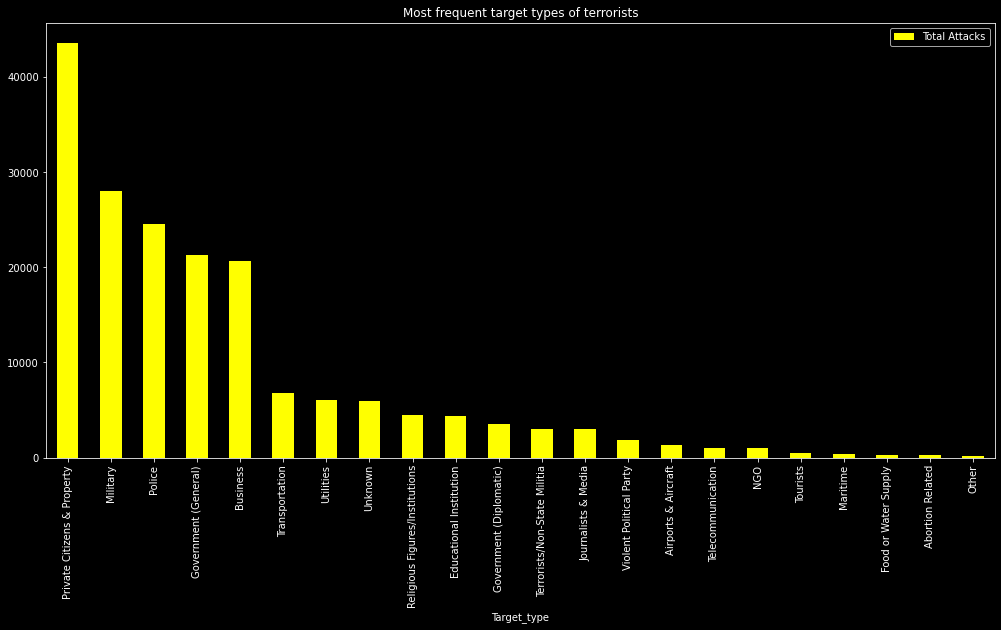

In [31]:
data = []

for i in df['Target_type'].value_counts().index:
    data.append([i , len(df[df['Target_type'] ==i])])
    
plot_data=pd.DataFrame(data,columns = ['Target_type','Total Attacks']).sort_values(by='Total Attacks', ascending=False)
plot_data.plot(x = "Target_type", y = "Total Attacks", title='Most frequent target types of terrorists',kind = 'bar',color='yellow',figsize = (17,8))
plt.style.use('dark_background')
plt.legend()

### Conclusion:
 •The above image shows the Most frequent target types of terrorists.
 
 •The Most frequent target type of terrorists is Private Citizens & Property.
 
 •The top 5 Most frequent target type of terrorists are 'Private Citizens & Property', 'Military', 'Police', 'Government (General)', 'Business'.


### FINAL OUTCOMES

 •The most affected region by terrorist attacks is Middle East and North Africa with 50K+ Terrorist Attacks.
 
 •The country which is most affected by terrorist attacks is Iraq.
 
 •The peak in terms of Number of Terrorists Attacks was observed in 2014.
 
 •The peak in terms of Number of People Harmed was observed in 2015 with 70K+ casualties.
 
 •The most affected Country by Total Casualities is Iraq with 200K+ Casualities.
 
 •The most affected State by Terrorist Attacks is Baghdadm with 7500+ Terrorist Attacks.
 
 •The Terrorist Group with Most No. of Terrorist Attacks is Taliban with 7K+ Terrorist Attacks.
 
 •The Most Used Attack Type by Terrorists is Bombing/Explosion.
 
 •The Most frequent target type of terrorists is Private Citizens & Property.